In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip

--2022-06-07 11:07:42--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2022-06-07 11:07:42--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb2b8d3e80e66075026993a624b.dl.dropboxusercontent.com/cd/0/inline/BmuYFQXlvppNZrUgKjJRPj5dHIIN9BdBO_OYq8sJELY4UEMrXL0dwraTxwioahfKjuYXa7n4Oq7OR4XM4h1W9tLCsgfp2ykuTVFJU-5BQbRpkCECt35fW36oZWPIvL__Ak6Hbld83ssg-AWVFTUCS5FXqZLJur5YIiPVgeBKvI8qKA/file# [following]
--2022-06-07 11:07:43--  https://ucb2b8d3e80e66075026993a624b.dl.dropboxuserco

In [4]:
!unzip /content/state-farm-distracted-driver-detection.zip

Archive:  /content/state-farm-distracted-driver-detection.zip
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [5]:
!rm /content/state-farm-distracted-driver-detection.zip

In [6]:
!unzip /content/imgs.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56661.jpg  
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  

In [7]:
!rm /content/imgs.zip

In [8]:
import pandas as pd

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
  
from sklearn.metrics import classification_report, confusion_matrix

# deep learning libraries
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
from tensorflow.keras import optimizers

import cv2
  
import warnings
warnings.filterwarnings('ignore')

In [10]:
# datasets
labels = pd.read_csv("/content/driver_imgs_list.csv")
sample = pd.read_csv('/content/sample_submission.csv')
  
# folders paths
train_path = "/content/train"
test_path = "/content/test"

In [11]:
labels.drop("subject", axis=1, inplace=True)

In [12]:
sample.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,img_10.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,img_100.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,img_1000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,img_100000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [13]:
sample.sample(5)

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
26214,img_38325.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
77888,img_97916.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
50168,img_65925.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1046,img_101202.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
35108,img_48598.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [14]:
labels.sample(10)

,classname,img
10370,c3,img_46497.jpg
6418,c6,img_45871.jpg
1278,c6,img_82468.jpg
8770,c5,img_34935.jpg
663,c8,img_18091.jpg
9120,c8,img_97558.jpg
3259,c9,img_69483.jpg
6612,c7,img_14644.jpg
358,c4,img_9121.jpg
3849,c5,img_48210.jpg


In [15]:
labels = labels.reindex (["img", "classname"], axis="columns")

In [16]:
gen = ImageDataGenerator(
    rescale = 1./255.,
    horizontal_flip = True,
    validation_split = 0.2
)

train_generator = gen.flow_from_directory(
    directory = train_path,
    target_size = (224, 224),
    class_mode="categorical",
    color_mode = "rgb",
    subset = "training",
    batch_size=32,
    seed = 42,
    shuffle = True
)

validation_generator = gen.flow_from_directory(
    directory = train_path,
    target_size = (224, 224),
    class_mode="categorical",
    color_mode = "rgb",
    subset = "validation",
    batch_size=32,
    seed = 42,
    shuffle = True
)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [17]:
x,y = next(train_generator)
x.shape

(32, 224, 224, 3)

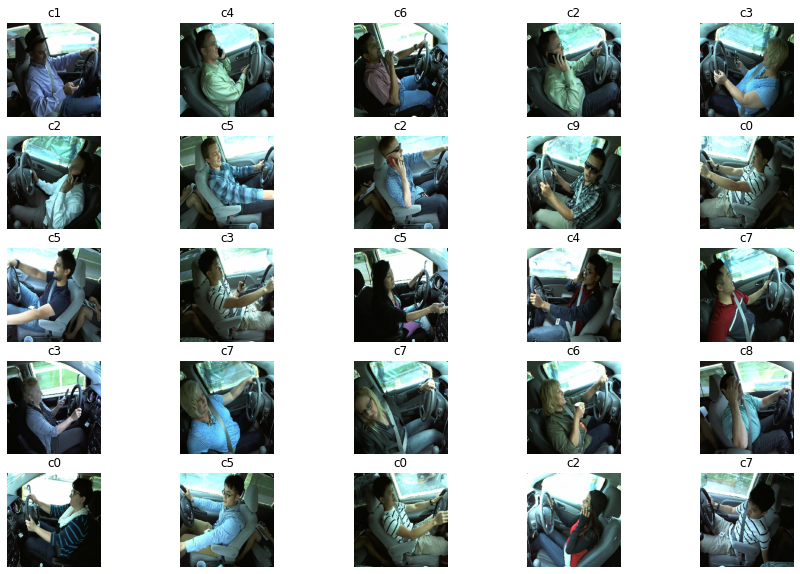

In [18]:
a = train_generator.class_indices
class_names = list(a.keys()) # storing class/breed names in a list

def plot_images(img,labels):
	plt.figure(figsize=[15,10])
	for i in range(25):
		plt.subplot(5,5,i+1)
		plt.imshow(img[i])
		plt.title(class_names[np.argmax(labels[i])])
		plt.axis('off')
		
plot_images(x,y)


In [27]:
model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False, input_shape=(224,224,3), pooling='avg',classes=10, weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator, validation_steps=20, verbose = 2)

In [ ]:
model.save('./Distracted_driver_multiclass_classification.h5')